In [1]:
# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
from scipy.interpolate import interp1d
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

#–ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ R^2, MSE, MAE, MAPE –∏ —Ç.–¥
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

1. –°–∫–∞—á–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç–∏ –º–µ—Ç—Ä–æ –≤–æ—Ç –æ—Ç—Å—é–¥–∞ https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volum

In [2]:
data2 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
data2.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [4]:
columns = ['traffic_volume', 'date_time', 'holiday', 'temp']
df2 = pd.DataFrame(data2, columns=columns)
df2.head()

traffic_volume            date_time holiday    temp
0            5545  2012-10-02 09:00:00    None  288.28
1            4516  2012-10-02 10:00:00    None  289.36
2            4767  2012-10-02 11:00:00    None  289.58
3            5026  2012-10-02 12:00:00    None  290.13
4            4918  2012-10-02 13:00:00    None  291.14

In [5]:
#–ü–æ–∏—â–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã 
df2[df2.duplicated(keep=False)].head()

traffic_volume            date_time holiday    temp
178            6793  2012-10-10 07:00:00    None  281.25
179            6793  2012-10-10 07:00:00    None  281.25
180            6283  2012-10-10 08:00:00    None  280.10
181            6283  2012-10-10 08:00:00    None  280.10
182            5680  2012-10-10 09:00:00    None  279.61

In [6]:
#–£–¥–∞–ª–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã
df2 = df2.drop_duplicates(keep='last')

2. –ü—Ä–æ–≤–æ–¥–∏–º –±–∞–∑–æ–≤—ã–π EDA, –≤–∞–º –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è —Ç–æ–ª—å–∫–æ 4 —Å—Ç–æ–ª–±—Ü–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ - traffic_volume (–Ω–∞—à–∞ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è), date_time, holiday (—è–≤–ª—è–µ—Ç—Å—è –ª–∏ –¥–µ–Ω—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∞–∑–¥–Ω–∏–∫–æ–º) –∏ temp (—Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –≤–æ–∑–¥—É—Ö–∞)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40653 entries, 0 to 48203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   traffic_volume  40653 non-null  int64  
 1   date_time       40653 non-null  object 
 2   holiday         40653 non-null  object 
 3   temp            40653 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [8]:
#–ü–æ–∏—â–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã 
df2[df2.duplicated(keep=False)].head()

Empty DataFrame
Columns: [traffic_volume, date_time, holiday, temp]
Index: []

In [9]:
df2.count()

traffic_volume    40653
date_time         40653
holiday           40653
temp              40653
dtype: int64

In [10]:
df2.set_index('date_time')

traffic_volume holiday    temp
date_time                                          
2012-10-02 09:00:00            5545    None  288.28
2012-10-02 10:00:00            4516    None  289.36
2012-10-02 11:00:00            4767    None  289.58
2012-10-02 12:00:00            5026    None  290.13
2012-10-02 13:00:00            4918    None  291.14
...                             ...     ...     ...
2018-09-30 19:00:00            3543    None  283.45
2018-09-30 20:00:00            2781    None  282.76
2018-09-30 21:00:00            2159    None  282.73
2018-09-30 22:00:00            1450    None  282.09
2018-09-30 23:00:00             954    None  282.12

[40653 rows x 3 columns]

In [11]:
#–ü–æ—Å–º–æ—Ç—Ä–∏–º –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
df2.isnull().sum()

traffic_volume    0
date_time         0
holiday           0
temp              0
dtype: int64

3. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º EDA —É–±–µ–∂–¥–∞–µ–º—Å—è, —á—Ç–æ –≤ —ç—Ç–æ–º –≤—Ä–µ–º–µ–Ω–Ω–æ–º —Ä—è–¥—É –≤–æ-–ø–µ—Ä–≤—ã—Ö, –µ—Å—Ç—å –¥—É–±–ª–∏–∫–∞—Ç—ã, –∞ –≤–æ-–≤—Ç–æ—Ä—ã—Ö, –Ω–∞—Ä—É—à–µ–Ω–∞ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤, —Ç.–µ. –Ω–µ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç—Å—Ç–æ—è—Ç –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ –Ω–∞ 1 —á–∞—Å - –¥—É–±–ª–∏–∫–∞—Ç—ã —É–¥–∞–ª—è–µ–º, –∞ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –≤—ã—Ä–∞–≤–Ω–∏–≤–∞–µ–º –∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –ª–∏–Ω–µ–π–Ω–æ–π –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ (–ø–æ–¥—Å–∫–∞–∑–∫–∞ - –≤ —ç—Ç–æ–º –≤–∞–º –ø–æ–º–æ–≥—É—Ç —Ñ—É–Ω–∫—Ü–∏–∏ pd.date_range, –∏ interpolate, –ø—Ä–∏–º–µ—Ä –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –∑–¥–µ—Å—å - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html)

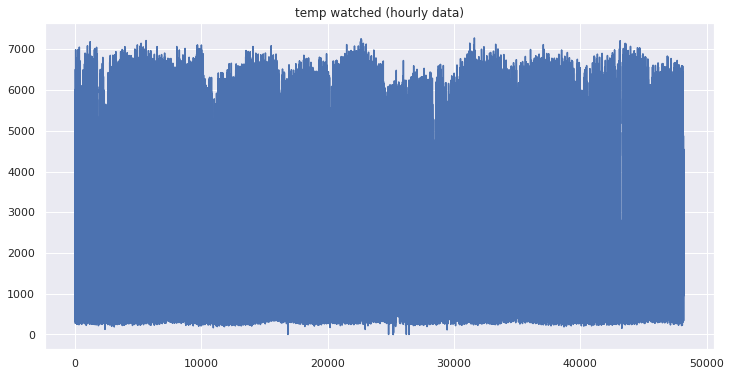

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df2.traffic_volume)
plt.title('temp watched (hourly data)')
plt.grid(True)
plt.show()

In [13]:
df2.head()

traffic_volume            date_time holiday    temp
0            5545  2012-10-02 09:00:00    None  288.28
1            4516  2012-10-02 10:00:00    None  289.36
2            4767  2012-10-02 11:00:00    None  289.58
3            5026  2012-10-02 12:00:00    None  290.13
4            4918  2012-10-02 13:00:00    None  291.14

In [14]:
df2.set_index('date_time',inplace=True)

In [15]:
df2.head()

traffic_volume holiday    temp
date_time                                          
2012-10-02 09:00:00            5545    None  288.28
2012-10-02 10:00:00            4516    None  289.36
2012-10-02 11:00:00            4767    None  289.58
2012-10-02 12:00:00            5026    None  290.13
2012-10-02 13:00:00            4918    None  291.14

In [16]:
df2[df2.index.duplicated()]

traffic_volume holiday    temp
date_time                                          
2012-11-04 01:00:00             730    None  275.77
2014-01-03 20:00:00            2427    None  268.88
2014-01-09 16:00:00            6421    None  266.47
2014-01-11 16:00:00            4546    None  272.02
2014-01-15 00:00:00             515    None  259.14
...                             ...     ...     ...
2016-12-16 18:00:00            2344    None  261.65
2016-12-17 01:00:00             425    None  261.82
2016-12-18 14:00:00            3437    None  251.23
2016-12-18 23:00:00            1033    None  254.14
2017-04-06 14:00:00            5446    None  284.58

[78 rows x 3 columns]

In [17]:
df4 = df2[~df2.index.duplicated()]

In [18]:
df4.head()

traffic_volume holiday    temp
date_time                                          
2012-10-02 09:00:00            5545    None  288.28
2012-10-02 10:00:00            4516    None  289.36
2012-10-02 11:00:00            4767    None  289.58
2012-10-02 12:00:00            5026    None  290.13
2012-10-02 13:00:00            4918    None  291.14

In [19]:
df4.index = pd.to_datetime(df4.index)

In [20]:
df4.index

DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 14:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=40575, freq=None)

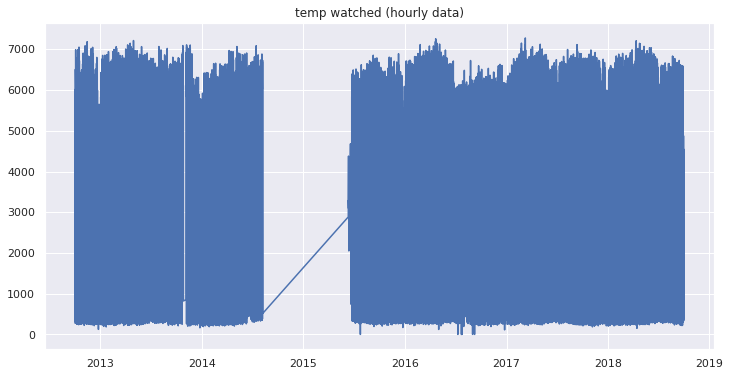

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df4.traffic_volume)
plt.title('temp watched (hourly data)')
plt.grid(True)
plt.show()

In [22]:
index = pd.date_range(start=df4.index.min(), end=df4.index.max(), freq='1H')

In [23]:
len(index)

52551

In [24]:
print(index)

DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 14:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', length=52551, freq='H')


In [25]:
df_reindexed = df4.reindex(index)

In [26]:
df_reindexed.count()

traffic_volume    40575
holiday           40575
temp              40575
dtype: int64

In [27]:
df_reindexed.head()

traffic_volume holiday    temp
2012-10-02 09:00:00          5545.0    None  288.28
2012-10-02 10:00:00          4516.0    None  289.36
2012-10-02 11:00:00          4767.0    None  289.58
2012-10-02 12:00:00          5026.0    None  290.13
2012-10-02 13:00:00          4918.0    None  291.14

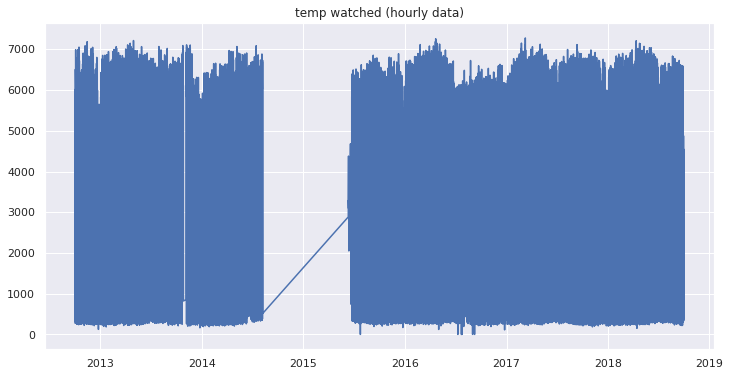

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df4.traffic_volume)
plt.title('temp watched (hourly data)')
plt.grid(True)
plt.show()

In [29]:
df_reindexed['traffic_volume'] = df_reindexed['traffic_volume'].interpolate(method='linear')
df_reindexed['holiday'] = df_reindexed['holiday'].interpolate(method='pad')
df_reindexed['temp'] = df_reindexed['temp'].interpolate(method='linear')

In [30]:
df_reindexed.isnull().sum()

traffic_volume    0
holiday           0
temp              0
dtype: int64

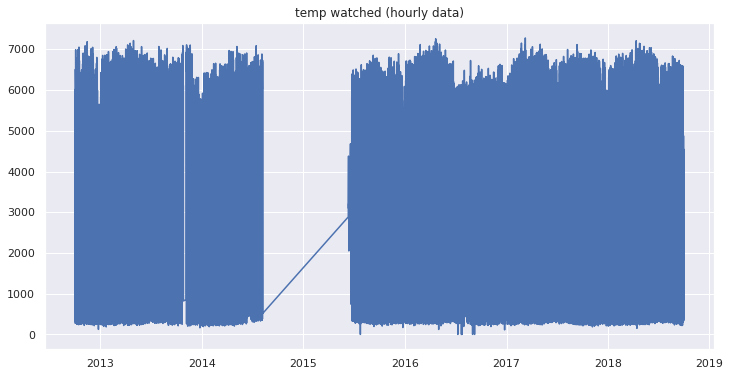

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df_reindexed.traffic_volume)
plt.title('temp watched (hourly data)')
plt.grid(True)
plt.show()

In [32]:
df_reindexed = df_reindexed[~df_reindexed.index.duplicated()]

In [33]:
df_reindexed.count()

traffic_volume    52551
holiday           52551
temp              52551
dtype: int64

In [34]:
df_reindexed.isnull().sum()

traffic_volume    0
holiday           0
temp              0
dtype: int64

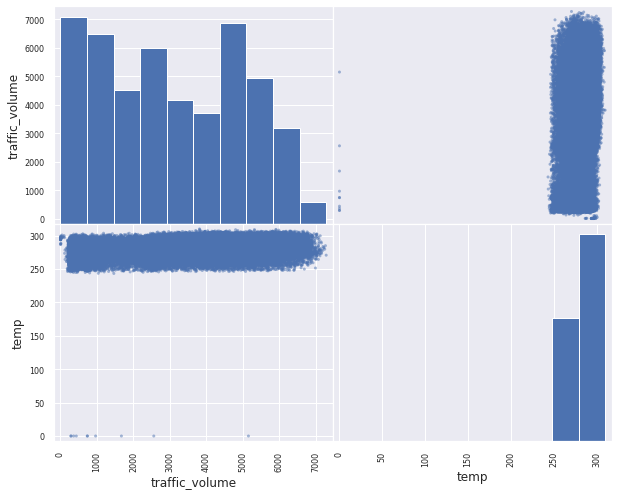

In [35]:
#–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç—Ä–∞—Ñ–∏–∫–∞ –∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã
num_vars = ['traffic_volume', 'temp']
from pandas.plotting import scatter_matrix
scatter_matrix(df_reindexed[num_vars],figsize=(10,8))
plt.show()

<Figure size 720x576 with 0 Axes>

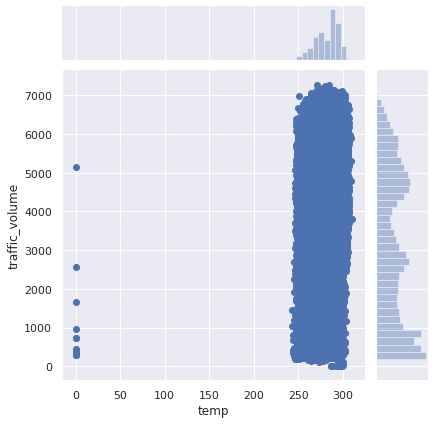

In [36]:
#–≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –æ—Ç –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏ –¥–≤–∏–∂–µ–Ω–∏—è
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = df_reindexed.loc[df_reindexed.temp>-50])
plt.show()

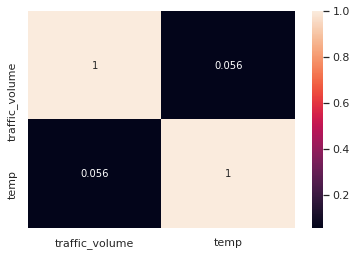

In [37]:
#–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
sns.heatmap(df_reindexed.corr(), annot=True)
plt.show()

Feature engineering and Data cleaning

In [38]:
df_traffic_features = df_reindexed.copy()

In [39]:
#–£–±–µ—Ä–µ–º –≤—ã–±—Ä–æ—Å
df_traffic_features = df_traffic_features.loc[df_traffic_features.temp>-250]

In [40]:
df_traffic_features.head()

traffic_volume holiday    temp
2012-10-02 09:00:00          5545.0    None  288.28
2012-10-02 10:00:00          4516.0    None  289.36
2012-10-02 11:00:00          4767.0    None  289.58
2012-10-02 12:00:00          5026.0    None  290.13
2012-10-02 13:00:00          4918.0    None  291.14

In [41]:
df_traffic_features['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [42]:
#—Ä–∞–±–æ—Ç–∞ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (dummy)
def modify_holiday(x):
    if x == 'None':
        return 0
    else:
        return 1
df_traffic_features['holiday'] = df_traffic_features['holiday'].map(modify_holiday)

In [43]:
df_traffic_features.head()

traffic_volume  holiday    temp
2012-10-02 09:00:00          5545.0        0  288.28
2012-10-02 10:00:00          4516.0        0  289.36
2012-10-02 11:00:00          4767.0        0  289.58
2012-10-02 12:00:00          5026.0        0  290.13
2012-10-02 13:00:00          4918.0        0  291.14

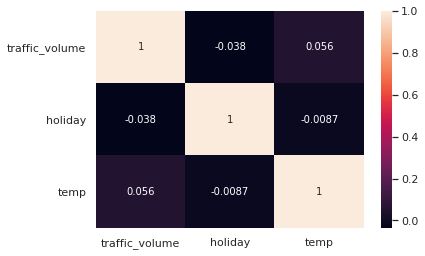

In [44]:
#–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
sns.heatmap(df_traffic_features.corr(), annot=True)
plt.show()

In [45]:
df_traffic_features.index.max()

Timestamp('2018-09-30 23:00:00', freq='H')

In [46]:
df_traffic_features.index.min()

Timestamp('2012-10-02 09:00:00', freq='H')

3. –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –∏–Ω–¥–µ–∫—Å–∞, –æ—Å–æ–±–µ–Ω–Ω–æ –Ω—É–∂–µ–Ω –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å –¥–Ω—è

In [48]:
df_traffic_features.head()

traffic_volume  holiday    temp
2012-10-02 09:00:00          5545.0        0  288.28
2012-10-02 10:00:00          4516.0        0  289.36
2012-10-02 11:00:00          4767.0        0  289.58
2012-10-02 12:00:00          5026.0        0  290.13
2012-10-02 13:00:00          4918.0        0  291.14

1. –û—Ç–ª–æ–∂–∏—Ç–µ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –¥–≤–µ –Ω–µ–¥–µ–ª–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏ - –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –≤—ã –±—É–¥–µ—Ç–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–∫

–ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
–ù–∞—à–µ–π —Ü–µ–ª—å—é –±—É–¥–µ—Ç –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è —Å–ø–æ—Å–æ–±–Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∑–∞–≥—Ä—É–∑–∫—É –º–µ—Ç—Ä–æ –Ω–∞ –±–ª–∏–∂–∞–π—à—É—é –Ω–µ–¥–µ–ª—é (—Ç.–µ, —Ç–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã–µ —É –Ω–∞—Å –¥–Ω–µ–≤–Ω—ã–µ, –º–æ–¥–µ–ª—å –¥–æ–ª–∂–Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ 24*7 —Ç–æ—á–µ–∫ –≤–ø–µ—Ä—ë–¥). 

–í–æ–ø—Ä–æ—Å: –í–æ—Ç —Ç—É—Ç –º–Ω–µ –Ω–µ –ø–æ–Ω—è—Ç–Ω–æ –∑–∞—á–µ–º –º—ã –¥–ª—è —Ç–µ—Å—Ç–∞ –æ—Ç–∫–ª–∞–¥—ã–≤–∞–µ–º –¥–≤–µ –Ω–µ–¥–µ–ª–∏, –µ—Å–ª–∏ –¥–æ–ª–∂–Ω—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –æ–¥–Ω—É? –ü–æ—ç—Ç–æ–º—É —è –æ—Ç–ª–æ–∂—É –æ–¥–Ω—É

In [49]:
y_test = pd.DataFrame(df_traffic_features['2018-09-24 00:00:00':].traffic_volume.copy())
X_test = pd.DataFrame(df_traffic_features['2018-09-24 00:00:00':].copy()).drop(['traffic_volume'], axis=1)

In [50]:
y_test.count()

traffic_volume    168
dtype: int64

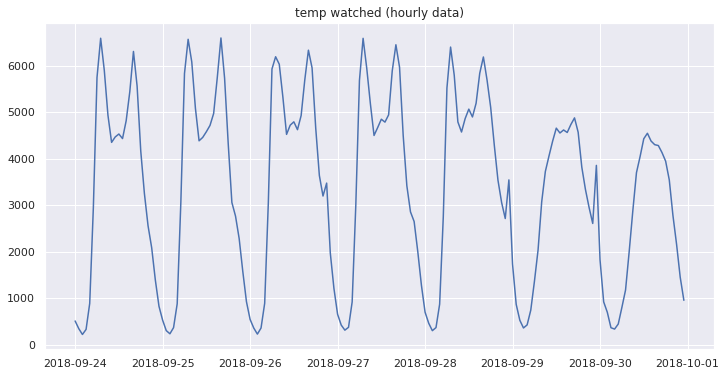

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.traffic_volume)
plt.title('temp watched (hourly data)')
plt.grid(True)
plt.show()

2. –¢–µ–ø–µ—Ä—å —É –≤–∞—Å –æ—Å—Ç–∞–ª–æ—Å—å –µ—â–µ –º–Ω–æ–≥–æ-–º–Ω–æ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–º —Ä—è–¥—É, –∏—Å—Ö–æ–¥—è –∏–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤, —Ç—Ä–µ–Ω–¥–æ–≤ –∏ —Ç.–¥., –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, –∫–∞–∫–∏–µ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –±—É–¥—É—Ç —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–æ–≤ —Ç–µ–∫—É—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –≤–æ–∑–º–æ–∂–Ω–æ, –ø—Ä–µ–¥—ã–¥—É—â–∏–µ —Ç—Ä–∏ –≥–æ–¥–∞ —É–∂–µ –Ω–µ —Ç–∞–∫ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Å–ª–µ–¥—É—é—â—É—é –Ω–µ–¥–µ–ª—é –∏ –º–æ–∂–Ω–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—É—é —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç–æ –≤—ã–∫–∏–Ω—É—Ç—å

In [52]:
y_train = pd.DataFrame(df_traffic_features['2018-07-24 00:00:00': '2018-09-24 00:00:00'].traffic_volume.copy())
X_train = pd.DataFrame(df_traffic_features['2018-07-24 00:00:00': '2018-09-24 00:00:00'].copy()).drop(['traffic_volume'], axis=1)

In [53]:
X_train['weekday'] = X_train.index.weekday
X_train['hour'] = X_train.index.hour

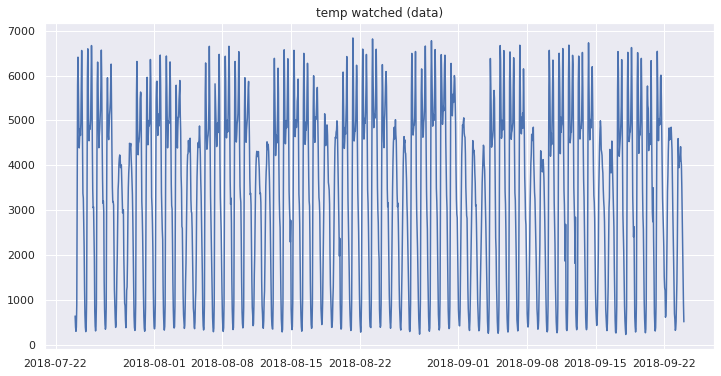

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_train.traffic_volume)
plt.title('temp watched (data)')
plt.grid(True)
plt.show()

In [55]:
X_train.isna().sum()

holiday    0
temp       0
weekday    0
hour       0
dtype: int64

In [56]:
X_train.index.min()

Timestamp('2018-07-24 00:00:00', freq='H')

4. –°—Ç—Ä–æ–∏–º baseline –ø—Ä–æ–≥–Ω–æ–∑ - –ø–æ —Ç–µ–º –¥–∞–Ω–Ω—ã–º, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã —Ä–µ—à–∏–ª–∏ –æ—Å—Ç–∞–≤–∏—Ç—å –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏, –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —á–∞—Å–∞–º –∏ –ø–æ –¥–Ω—è–º (–≤–∞–º –ø–æ–º–æ–∂–µ—Ç data.groupby(["weekday", "hour"])["traffic_volume"].mean() –∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–æ–≥–Ω–æ–∑–∞ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É - –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã –ø–æ—Å—á–∏—Ç–∞–µ—Ç–µ –Ω—É–∂–Ω—ã–º–∏

In [57]:
df_baseline = pd.DataFrame(y_train["traffic_volume"].copy())
df_baseline['weekday'] = y_train.index.weekday
df_baseline['hour'] = y_train.index.hour

In [58]:
baseline = df_baseline.groupby(["weekday", "hour"])["traffic_volume"].mean()

In [59]:
baseline.count()

168

In [60]:
print(baseline)

weekday  hour
0        0        681.888889
         1        415.750000
         2        325.500000
         3        345.750000
         4        833.625000
                    ...     
6        19      3463.888889
         20      3074.666667
         21      2558.555556
         22      1885.444444
         23      1348.444444
Name: traffic_volume, Length: 168, dtype: float64


–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã –ø–æ—Å—á–∏—Ç–∞–µ—Ç–µ –Ω—É–∂–Ω—ã–º–∏

In [61]:
# –ø–æ–¥–≥—Ä—É–∂–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏
#–º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ (–º–æ–∂–Ω–æ –≤–∑—è—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ, R2, MAE, RMSE)
#–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE) –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –∏—Å—Ö–æ–¥–Ω—ã–º–∏ –∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã–º–∏ –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–æ–º —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–π –∞–±—Å–æ–ª—é—Ç–Ω–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –ø–æ –Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö.
#–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞ (RMSE) —ç—Ç–æ —á–∞—Å—Ç–æ—Ç–∞ –æ—à–∏–±–æ–∫, –≤—ã—á–∏—Å–ª—è–µ–º–∞—è –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–º –∫–æ—Ä–Ω–µ–º –∏–∑ MSE.
#–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R2) - –æ–ø–∏—Å—è–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏. –ß–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –ª—É—á—à–µ –º–æ–¥–µ–ª—å (–æ—Ç 0 –¥–æ 1, 1 –∏–¥–µ–∞–ª—å–Ω—ã–π)
#–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è–ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAPE) - –ø—Ä–æ—Ü–µ–Ω—Ç –∫–æ–ª-–≤–∞ –æ—à–∏–±–æ–∫
#–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞ (MSE) - –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –∏—Å—Ö–æ–¥–Ω—ã–º –∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã–º–∏ –ø—É—Ç–µ–º –≤–æ–∑–≤–µ–¥–µ–Ω–∏—è –≤ –∫–≤–∞–¥—Ä–∞—Ç —Å—Ä–µ–¥–Ω–µ–π —Ä–∞–∑–Ω–∏—Ü—ã –ø–æ –Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö.
from sklearn import metrics
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats
measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

Empty DataFrame
Columns: []
Index: [MAE, RMSE, R2, MAPE]

In [62]:
y_pred_naive = np.ones(len(y_test)) * baseline  # —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–ª–∏ –∏–º —Ü–µ–Ω—É –≤—Å–µ—Ö –∫–≤–∞—Ä—Ç–∏—Ä –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
measured_metrics["y_pred_naive"] = dataframe_metrics(y_test, y_pred_naive)
measured_metrics

error_type  y_pred_naive
0        MAE    175.821346
1       RMSE    283.444965
2         R2      0.979657
3       MAPE    194.188929

5. –ê —Ç–µ–ø–µ—Ä—å —Å–≤–æ–±–æ–¥–Ω–æ–µ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ - –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Å –≤–∞–º–∏ —Ä–∞–∑–±–∏—Ä–∞–ª–∏, –∏ –ø–æ–±–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –±–∞–∑–æ–≤–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∞.

### SARIMA

In [63]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [64]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey‚ÄìFuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, method="ols")
        plt.tight_layout()

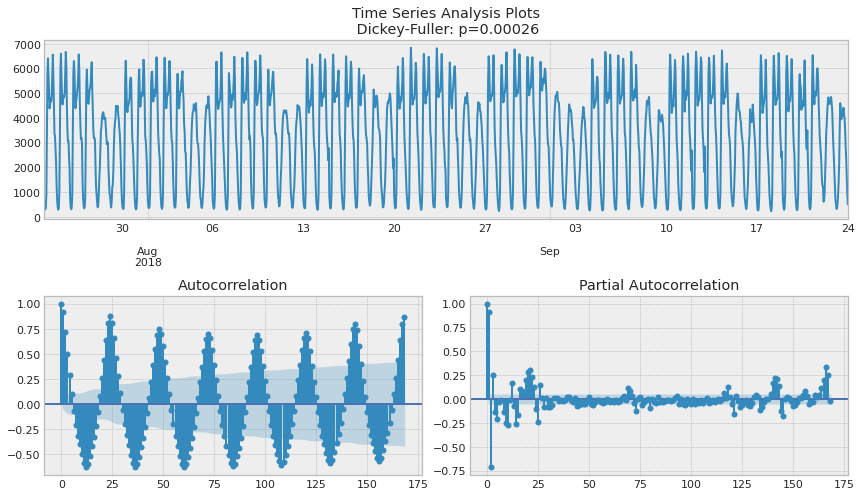

In [65]:
tsplot(y_train.traffic_volume, lags=168)

—Ä—è–¥ –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –î–∏–∫–∫–∏-–§—É–ª–ª–µ—Ä–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω, –ø–æ –µ–≥–æ –≥—Ä–∞—Ñ–∏–∫—É —Ç–æ–∂–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —Ç—Ä–µ–Ω–¥, –∫–∞–∫ —Ç–∞–∫–æ–≤–æ–π, –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç, —Ç.–µ., –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ, —Ä–∞–∑–±—Ä–æ—Å –≤–æ–∫—Ä—É–≥ —Å—Ä–µ–¥–Ω–µ–≥–æ —Ç–æ–∂–µ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π, –∑–Ω–∞—á–∏—Ç, –ø–æ—Å—Ç–æ—è–Ω—Å—Ç–≤–æ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ —Ç–∞–∫–∂–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è

–ö–æ—Å–∏–Ω—É—Å–æ–π–¥–∞ - —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, —Å –∫–æ—Ç–æ—Ä–æ–π –Ω—É–∂–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –ø–µ—Ä–µ–¥ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏. –î–ª—è —ç—Ç–æ–≥–æ –≤—ã–ø–æ–ª–Ω–∏–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ–¥ —Ö–∏—Ç—Ä—ã–º –Ω–∞–∑–≤–∞–Ω–∏–µ–º "—Å–µ–∑–æ–Ω–Ω–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ", –ø–æ–¥ –∫–æ—Ç–æ—Ä—ã–º —Å–∫—Ä—ã–≤–∞–µ—Ç—Å—è –ø—Ä–æ—Å—Ç–æ–µ –≤—ã—á–∏—Ç–∞–Ω–∏–µ –∏–∑ —Ä—è–¥–∞ —Å–∞–º–æ–≥–æ —Å–µ–±—è —Å –ª–∞–≥–æ–º —Ä–∞–≤–Ω—ã–º –ø–µ—Ä–∏–æ–¥—É —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ—Ç 24*7=168 —á–∞—Å–∞

In [66]:
season = 168

In [67]:
y_train.count()

traffic_volume    1489
dtype: int64

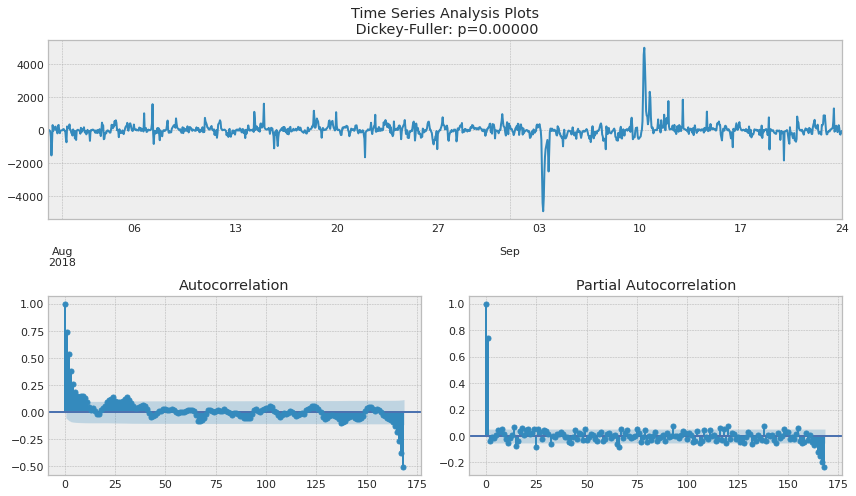

In [68]:
y_train_season = y_train.traffic_volume - y_train.traffic_volume.shift(season)
tsplot(y_train_season[season:], lags=season)

–£–∂–µ –ª—É—á—à–µ, –æ—Ç –≤–∏–¥–∏–º–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∏–∑–±–∞–≤–∏–ª–∏—Å—å, –≤ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ-–ø—Ä–µ–∂–Ω–µ–º—É –æ—Å—Ç–∞–ª–æ—Å—å –º–Ω–æ–≥–æ –∑–Ω–∞—á–∏–º—ã—Ö –ª–∞–≥–æ–≤, –ø–æ–ø—Ä–æ–±—É–µ–º –æ—Ç –Ω–∏—Ö –∏–∑–±–∞–≤–∏—Ç—å—Å—è, –≤–∑—è–≤ –µ—â–µ –∏ –ø–µ—Ä–≤—ã–µ —Ä–∞–∑–Ω–æ—Å—Ç–∏ - —Ç–æ –µ—Å—Ç—å –≤—ã—á–∏—Ç–∞–Ω–∏–µ —Ä—è–¥–∞ —Å–∞–º–æ–≥–æ –∏–∑ —Å–µ–±—è —Å –ª–∞–≥–æ–º –≤ –æ–¥–∏–Ω —à–∞–≥

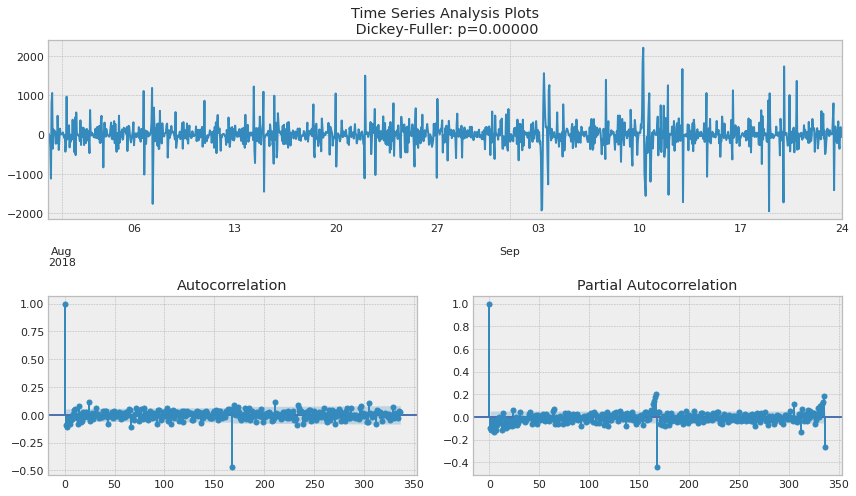

In [72]:
y_train_shift = y_train_season - y_train_season.shift(1)
tsplot(y_train_shift[season+1:], lags=season*2)

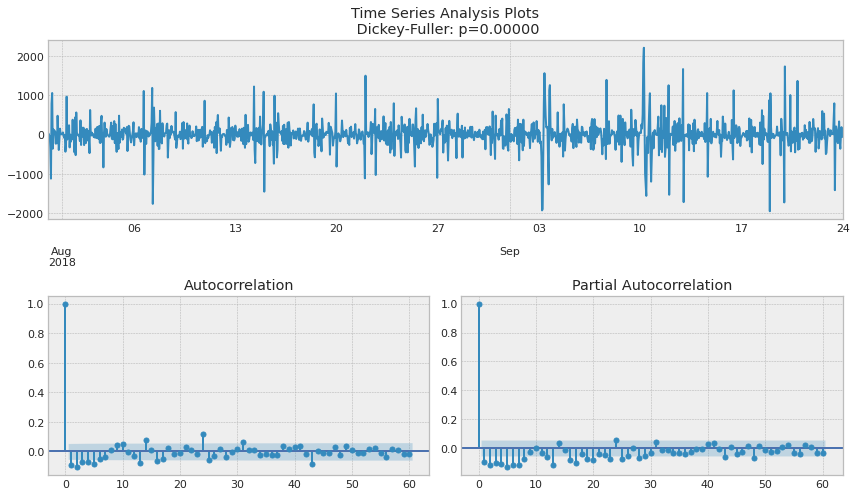

In [70]:
tsplot(y_train_shift[season+1:], lags=60)

—Ç–µ–ø–µ—Ä—å —Ä—è–¥ –≤—ã–≥–ª—è–¥–∏—Ç –∫–∞–∫ –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ —á—Ç–æ, –∫–æ–ª–µ–±–ª—é—â–µ–µ—Å—è –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è, –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –î–∏–∫–∫–∏-–§—É–ª–ª–µ—Ä–∞ –æ–Ω —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω, –∞ –≤ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–æ–ø–∞–ª–∏ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–∏–º—ã–µ –ø–∏–∫–∏. –ú–æ–∂–Ω–æ –ø—Ä–∏—Å—Ç—É–ø–∞—Ç—å –∫ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é!

ùê¥ùëÖ(ùëù)  - –º–æ–¥–µ–ª—å –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–°–º–æ—Ç—Ä–∏–º –∑–Ω–∞—á–∏–º—ã–µ –ª–∞–≥–∏ –≤ Partial Autocorrelation)
ùëÄùê¥(ùëû)  - –º–æ–¥–µ–ª—å —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ (–°–º–æ—Ç—Ä–∏–º –∑–Ω–∞—á–∏–º—ã–µ –ª–∞–≥–∏ –≤ Autocorrelation)
ùê¥ùëÖ(ùëù)+ùëÄùê¥(ùëû)=ùê¥ùëÖùëÄùê¥(ùëù,ùëû)
ùêº(ùëë)  - –ø–æ—Ä—è–¥–æ–∫ –∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ (–ö–æ–ª-–≤–æ –Ω–µ —Å–µ–∑–æ–Ω–Ω—ã—Ö —Ä–∞–∑–Ω–æ—Å—Ç–µ–π)
ùëÜ(ùë†)  - —ç—Ç–∞ –±—É–∫–≤–∞ –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ —Ä–∞–≤–Ω–∞ –¥–ª–∏–Ω–µ –ø–µ—Ä–∏–æ–¥–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –≤–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–º —Ä—è–¥–µ
ùëÉ  - –ø–æ—Ä—è–¥–æ–∫ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –¥–ª—è —Å–µ–∑–æ–Ω–Ω–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ PACF, —Å–º–æ—Ç—Ä–µ—Ç—å –Ω—É–∂–Ω–æ –Ω–∞ —á–∏—Å–ª–æ –∑–Ω–∞—á–∏–º—ã—Ö –ª–∞–≥–æ–≤ (–°–º–æ—Ç—Ä–∏–º –∫–æ–ª-–≤–æ –∑–Ω–∞—á–µ–º—ã—Ö –ª–∞–≥–æ–≤ –∫—Ä–∞—Ç–Ω—ã–µ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –≤ Partial Autocorrelation)
ùëÑ  - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ, –Ω–æ –¥–ª—è –º–æ–¥–µ–ª–∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ —Å–µ–∑–æ–Ω–Ω–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–µ, –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ ACF (–°–º–æ—Ç—Ä–∏–º –∫–æ–ª-–≤–æ –∑–Ω–∞—á–µ–º—ã—Ö –ª–∞–≥–æ–≤ –∫—Ä–∞—Ç–Ω—ã–µ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –≤ Autocorrelation)
ùê∑  - –ø–æ—Ä—è–¥–æ–∫ —Å–µ–∑–æ–Ω–Ω–æ–π –∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞. (–ö–æ–ª-–≤–æ —Å–µ–∑–æ–Ω–Ω—ã—Ö –¥–∏—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–π)

–ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –ª—É—á—à–µ

In [75]:
# setting initial values and some bounds for them
ps = [8, 13]
d=1 
qs = [6]
Ps = [2,3]
D=1 
Qs = [1]
s = 24*7

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

4

In [76]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(y_train.traffic_volume, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
# –ù–∞ –º–æ–µ–º –∫–æ–º–ø—å—é—Ç–µ—Ä–µ –∑–∞ –Ω–æ—á—å –Ω–µ —Å–º–æ–≥–ª–æ —Ä–∞—Å—á–∏—Ç–∞—Ç—å—Å—è 
#%time
#result_table = optimizeSARIMA(parameters_list, d, D, s)

In [78]:
# set the parameters that give the lowest AIC
#p, q, P, Q = result_table.parameters[0]
#p, q, P, Q = [8,6,2,1]
#best_model=sm.tsa.statespace.SARIMAX(y_train.traffic_volume, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
#print(best_model.summary())

KeyboardInterrupt: 

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—Å—Ç–∞—Ç–∫–∏ –º–æ–¥–µ–ª–∏:

In [ ]:
#tsplot(best_model.resid[24*7+1:], lags=168)

–ß—Ç–æ –∂, –æ—Å—Ç–∞—Ç–∫–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã, —è–≤–Ω—ã—Ö –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –Ω–µ—Ç, –ø–æ—Å—Ç—Ä–æ–∏–º –ø—Ä–æ–≥–Ω–æ–∑ –ø–æ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –º–æ–¥–µ–ª–∏

In [ ]:
def plotSARIMA(series, model, n_steps, s=24*7, d=1, plot_intervals=True, alpha=0.2):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = best_model.get_forecast(steps=n_steps)
    model_predictions = data.arima_model.append(forecast.predicted_mean)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))    
    
    plt.plot(model_predictions, color='r', label="model")
    plt.plot(data.actual, label="actual")
    
    if plot_intervals:
        intervals = forecast.conf_int(alpha=alpha)
        intervals.columns=['lower', 'upper']
        plt.plot(intervals['lower'], "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(intervals['upper'], "r--", alpha=0.5)
        plt.fill_between(x=intervals.index, y1=intervals['upper'], 
                         y2=intervals['lower'], alpha=0.2, color = "grey")    
    
    
    plt.legend()
    plt.grid(True);

In [ ]:
#plotSARIMA(y_test, best_model, 168, alpha=0.5)

–í —Ñ–∏–Ω–∞–ª–µ –ø–æ–ª—É—á–∞–µ–º –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π –ø—Ä–æ–≥–Ω–æ–∑, –∑–∞–∫–∞–∑—á–∏–∫—É —Å—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –≤ 6 –ø—Ä–æ—Ü–µ–Ω—Ç–∞ —Ç–∞–∫–∂–µ –Ω–∞–≤–µ—Ä–Ω—è–∫–∞ –ø–æ–Ω—Ä–∞–≤–∏—Ç—Å—è, –æ–¥–Ω–∞–∫–æ —Å—É–º–º–∞—Ä–Ω—ã–µ –∑–∞—Ç—Ä–∞—Ç—ã –Ω–∞ –ø–æ–¥–≥–æ—Ç–æ–≤–∫—É –¥–∞–Ω–Ω—ã—Ö, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –ø–µ—Ä–µ–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–≥—É—Ç —Ç–∞–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –Ω–µ —Å—Ç–æ–∏—Ç—å.

### –õ–∞–≥–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

–°–¥–≤–∏–≥–∞—è —Ä—è–¥ –Ω–∞  ùëõ  —à–∞–≥–æ–≤ –º—ã –ø–æ–ª—É—á–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü-–ø—Ä–∏–∑–Ω–∞–∫, –≤ –∫–æ—Ç–æ—Ä–æ–º —Ç–µ–∫—É—â–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é —Ä—è–¥–∞ –≤ –º–æ–º–µ–Ω—Ç  ùë°  –±—É–¥–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏  ùë°‚àíùëõ . –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –µ—Å–ª–∏ —Å–¥–µ–ª–∞—Ç—å –æ—Ç—Å—Ç—É–ø –≤ 1 —à–∞–≥, —Ç–æ –º–æ–¥–µ–ª—å, –æ–±—É—á–µ–Ω–Ω–∞—è –Ω–∞ —Ç–∞–∫–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ, –±—É–¥–µ—Ç —Å–ø–æ—Å–æ–±–Ω–∞ –¥–∞–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ 1 —à–∞–≥ –≤–ø–µ—Ä–µ–¥, –∑–Ω–∞—è —Ç–µ–∫—É—â–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —Ä—è–¥–∞. –£–≤–µ–ª–∏—á–∏–≤–∞—è —Å–¥–≤–∏–≥, –Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ 14 –ª–∞–≥–∞ –ø–æ–∑–≤–æ–ª–∏—Ç –º–æ–¥–µ–ª–∏ –¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ 6 —à–∞–≥–æ–≤ –≤–ø–µ—Ä—ë–¥, –æ–¥–Ω–∞–∫–æ –æ–ø–∏—Ä–∞—Ç—å—Å—è –æ–Ω–∞ –±—É–¥–µ—Ç –Ω–∞ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –≤–∏–¥–µ–ª–∞ 14 –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤ –Ω–∞–∑–∞–¥ –∏ –µ—Å–ª–∏ –∑–∞ —ç—Ç–æ –≤—Ä–µ–º—è —á—Ç–æ-—Ç–æ –∫–∞—Ä–¥–∏–Ω–∞–ª—å–Ω–æ –ø–æ–º–µ–Ω—è–ª–æ—Å—å, –º–æ–¥–µ–ª—å —Å—Ä–∞–∑—É –Ω–µ —É–ª–æ–≤–∏—Ç –∏–∑–º–µ–Ω–µ–Ω–∏–π –∏ –≤—ã–¥–∞—Å—Ç –ø—Ä–æ–≥–Ω–æ–∑ —Å –±–æ–ª—å—à–æ–π –æ—à–∏–±–∫–æ–π. –ü–æ—ç—Ç–æ–º—É –ø—Ä–∏ –≤—ã–±–æ—Ä–µ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –ª–∞–≥–∞ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å—Å—è –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –º–µ–∂–¥—É –∂–µ–ª–∞–Ω–∏–µ–º –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –±–û–ª—å—à–µ–µ —á–∏—Å–ª–æ –ø–µ—Ä–∏–æ–¥–æ–≤ –≤–ø–µ—Ä—ë–¥ –∏ –ø—Ä–∏–µ–º–ª–∏–º—ã–º –∫–∞—á–µ—Å—Ç–≤–æ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [188]:
data_copy = pd.DataFrame(df_traffic_features['2018-07-24 00:00:00': '2018-09-30 23:00:00'].copy())
data_copy.drop(["holiday", "temp"], axis=1, inplace=True)

In [189]:
data_copy.columns

Index(['traffic_volume'], dtype='object')

In [190]:
data_copy.head()

traffic_volume
2018-07-24 00:00:00           638.0
2018-07-24 01:00:00           391.0
2018-07-24 02:00:00           297.0
2018-07-24 03:00:00           390.0
2018-07-24 04:00:00           891.0

In [191]:
data_copy.tail()

traffic_volume
2018-09-30 19:00:00          3543.0
2018-09-30 20:00:00          2781.0
2018-09-30 21:00:00          2159.0
2018-09-30 22:00:00          1450.0
2018-09-30 23:00:00           954.0

In [192]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data_copy["lag_{}".format(i)] = data_copy.traffic_volume.shift(i)

In [193]:
# take a look at the new dataframe 
data_copy.head(25)

traffic_volume   lag_6   lag_7   lag_8   lag_9  lag_10  \
2018-07-24 00:00:00           638.0     NaN     NaN     NaN     NaN     NaN   
2018-07-24 01:00:00           391.0     NaN     NaN     NaN     NaN     NaN   
2018-07-24 02:00:00           297.0     NaN     NaN     NaN     NaN     NaN   
2018-07-24 03:00:00           390.0     NaN     NaN     NaN     NaN     NaN   
2018-07-24 04:00:00           891.0     NaN     NaN     NaN     NaN     NaN   
2018-07-24 05:00:00          3184.0     NaN     NaN     NaN     NaN     NaN   
2018-07-24 06:00:00          5782.0   638.0     NaN     NaN     NaN     NaN   
2018-07-24 07:00:00          6409.0   391.0   638.0     NaN     NaN     NaN   
2018-07-24 08:00:00          5658.0   297.0   391.0   638.0     NaN     NaN   
2018-07-24 09:00:00          4984.0   390.0   297.0   391.0   638.0     NaN   
2018-07-24 10:00:00          4386.0   891.0   390.0   297.0   391.0   638.0   
2018-07-24 11:00:00          4634.0  3184.0   891.0   390.0   297.0   391.0   
2018-07-24 12:00:00          4805.0  5782.0  3184.0   891.0   390.0   297.0   
2018-07-24 13:00:00          4664.0  6409.0  5782.0  3184.0   891.0   390.0   
2018-07-24 14:00:00          4944.0  5658.0  6409.0  5782.0  3184.0   891.0   
2018-07-24 15:00:00          5699.0  4984.0  5658.0  6409.0  5782.0  3184.0   
2018-07-24 16:00:00          6558.0  4386.0  4984.0  5658.0  6409.0  5782.0   
2018-07-24 17:00:00          5636.0  4634.0  4386.0  4984.0  5658.0  6409.0   
2018-07-24 18:00:00          4430.0  4805.0  4634.0  4386.0  4984.0  5658.0   
2018-07-24 19:00:00          3371.0  4664.0  4805.0  4634.0  4386.0  4984.0   
2018-07-24 20:00:00          3266.0  4944.0  4664.0  4805.0  4634.0  4386.0   
2018-07-24 21:00:00          2727.0  5699.0  4944.0  4664.0  4805.0  4634.0   
2018-07-24 22:00:00          2178.0  6558.0  5699.0  4944.0  4664.0  4805.0   
2018-07-24 23:00:00          1269.0  5636.0  6558.0  5699.0  4944.0  4664.0   
2018-07-25 00:00:00           664.0  4430.0  5636.0  6558.0  5699.0  4944.0   

                     lag_11  lag_12  lag_13  lag_14  lag_15  lag_16  lag_17  \
2018-07-24 00:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 02:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 03:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 04:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 05:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 06:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 07:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 08:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 09:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 10:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 11:00:00   638.0     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07-24 12:00:00   391.0   638.0     NaN     NaN     NaN     NaN     NaN   
2018-07-24 13:00:00   297.0   391.0   638.0     NaN     NaN     NaN     NaN   
2018-07-24 14:00:00   390.0   297.0   391.0   638.0     NaN     NaN     NaN   
2018-07-24 15:00:00   891.0   390.0   297.0   391.0   638.0     NaN     NaN   
2018-07-24 16:00:00  3184.0   891.0   390.0   297.0   391.0   638.0     NaN   
2018-07-24 17:00:00  5782.0  3184.0   891.0   390.0   297.0   391.0   638.0   
2018-07-24 18:00:00  6409.0  5782.0  3184.0   891.0   390.0   297.0   391.0   
2018-07-24 19:00:00  5658.0  6409.0  5782.0  3184.0   891.0   390.0   297.0   
2018-07-24 20:00:00  4984.0  5658.0  6409.0  5782.0  3184.0   891.0   390.0   
2018-07-24 21:00:00  4386.0  4984.0  5658.0  6409.0  5782.0  3184.0   891.0   
2018-07-24 22:00:00  4634.0  4386.0  4984.0  5658.0  6409.0  5782.0  3184.0   
2018-07-24 23:00:00  4805.0  4634.0  4386.0  4984.0  5658.0  6409.0  5

In [194]:
data_copy = data_copy.dropna()

In [195]:
# take a look at the new dataframe 
data_copy.head(25)

traffic_volume   lag_6   lag_7   lag_8   lag_9  lag_10  \
2018-07-25 00:00:00           664.0  4430.0  5636.0  6558.0  5699.0  4944.0   
2018-07-25 01:00:00           388.0  3371.0  4430.0  5636.0  6558.0  5699.0   
2018-07-25 02:00:00           290.0  3266.0  3371.0  4430.0  5636.0  6558.0   
2018-07-25 03:00:00           372.0  2727.0  3266.0  3371.0  4430.0  5636.0   
2018-07-25 04:00:00           955.0  2178.0  2727.0  3266.0  3371.0  4430.0   
2018-07-25 05:00:00          3121.0  1269.0  2178.0  2727.0  3266.0  3371.0   
2018-07-25 06:00:00          5926.0   664.0  1269.0  2178.0  2727.0  3266.0   
2018-07-25 07:00:00          6595.0   388.0   664.0  1269.0  2178.0  2727.0   
2018-07-25 08:00:00          5651.0   290.0   388.0   664.0  1269.0  2178.0   
2018-07-25 09:00:00          4974.0   372.0   290.0   388.0   664.0  1269.0   
2018-07-25 10:00:00          4545.0   955.0   372.0   290.0   388.0   664.0   
2018-07-25 11:00:00          4879.0  3121.0   955.0   372.0   290.0   388.0   
2018-07-25 12:00:00          4799.0  5926.0  3121.0   955.0   372.0   290.0   
2018-07-25 13:00:00          4860.0  6595.0  5926.0  3121.0   955.0   372.0   
2018-07-25 14:00:00          5032.0  5651.0  6595.0  5926.0  3121.0   955.0   
2018-07-25 15:00:00          5826.0  4974.0  5651.0  6595.0  5926.0  3121.0   
2018-07-25 16:00:00          6668.0  4545.0  4974.0  5651.0  6595.0  5926.0   
2018-07-25 17:00:00          6108.0  4879.0  4545.0  4974.0  5651.0  6595.0   
2018-07-25 18:00:00          4459.0  4799.0  4879.0  4545.0  4974.0  5651.0   
2018-07-25 19:00:00          3473.0  4860.0  4799.0  4879.0  4545.0  4974.0   
2018-07-25 20:00:00          3053.0  5032.0  4860.0  4799.0  4879.0  4545.0   
2018-07-25 21:00:00          3072.0  5826.0  5032.0  4860.0  4799.0  4879.0   
2018-07-25 22:00:00          2422.0  6668.0  5826.0  5032.0  4860.0  4799.0   
2018-07-25 23:00:00          1922.0  6108.0  6668.0  5826.0  5032.0  4860.0   
2018-07-26 00:00:00           750.0  4459.0  6108.0  6668.0  5826.0  5032.0   

                     lag_11  lag_12  lag_13  lag_14  lag_15  lag_16  lag_17  \
2018-07-25 00:00:00  4664.0  4805.0  4634.0  4386.0  4984.0  5658.0  6409.0   
2018-07-25 01:00:00  4944.0  4664.0  4805.0  4634.0  4386.0  4984.0  5658.0   
2018-07-25 02:00:00  5699.0  4944.0  4664.0  4805.0  4634.0  4386.0  4984.0   
2018-07-25 03:00:00  6558.0  5699.0  4944.0  4664.0  4805.0  4634.0  4386.0   
2018-07-25 04:00:00  5636.0  6558.0  5699.0  4944.0  4664.0  4805.0  4634.0   
2018-07-25 05:00:00  4430.0  5636.0  6558.0  5699.0  4944.0  4664.0  4805.0   
2018-07-25 06:00:00  3371.0  4430.0  5636.0  6558.0  5699.0  4944.0  4664.0   
2018-07-25 07:00:00  3266.0  3371.0  4430.0  5636.0  6558.0  5699.0  4944.0   
2018-07-25 08:00:00  2727.0  3266.0  3371.0  4430.0  5636.0  6558.0  5699.0   
2018-07-25 09:00:00  2178.0  2727.0  3266.0  3371.0  4430.0  5636.0  6558.0   
2018-07-25 10:00:00  1269.0  2178.0  2727.0  3266.0  3371.0  4430.0  5636.0   
2018-07-25 11:00:00   664.0  1269.0  2178.0  2727.0  3266.0  3371.0  4430.0   
2018-07-25 12:00:00   388.0   664.0  1269.0  2178.0  2727.0  3266.0  3371.0   
2018-07-25 13:00:00   290.0   388.0   664.0  1269.0  2178.0  2727.0  3266.0   
2018-07-25 14:00:00   372.0   290.0   388.0   664.0  1269.0  2178.0  2727.0   
2018-07-25 15:00:00   955.0   372.0   290.0   388.0   664.0  1269.0  2178.0   
2018-07-25 16:00:00  3121.0   955.0   372.0   290.0   388.0   664.0  1269.0   
2018-07-25 17:00:00  5926.0  3121.0   955.0   372.0   290.0   388.0   664.0   
2018-07-25 18:00:00  6595.0  5926.0  3121.0   955.0   372.0   290.0   388.0   
2018-07-25 19:00:00  5651.0  6595.0  5926.0  3121.0   955.0   372.0   290.0   
2018-07-25 20:00:00  4974.0  5651.0  6595.0  5926.0  3121.0   955.0   372.0   
2018-07-25 21:00:00  4545.0  4974.0  5651.0  6595.0  5926.0  3121.0   955.0   
2018-07-25 22:00:00  4879.0  4545.0  4974.0  5651.0  6595.0  5926.0  3121.0   
2018-07-25 23:00:00  4799.0  4879.0  4545.0  4974.0  5651.0  6595.0  5

In [196]:
data_copy.shape

(1632, 20)

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [238]:
# –ù–∞—à–µ–π —Ü–µ–ª—å—é –±—É–¥–µ—Ç –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è —Å–ø–æ—Å–æ–±–Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∑–∞–≥—Ä—É–∑–∫—É –º–µ—Ç—Ä–æ –Ω–∞ –±–ª–∏–∂–∞–π—à—É—é –Ω–µ–¥–µ–ª—é.
# –û—Ç–ª–æ–∂–∏–º –Ω–µ–¥–µ–ª—é –Ω–∞ —Ç–µ—Å—Ç
def timeseries_train_test_split(X, y, test_index):
    """
        Perform train-test split with respect to time series structure
    """
    X_train = X.iloc[:test_index-1]
    y_train = y.iloc[:test_index-1]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    
    return X_train, X_test, y_train, y_test

In [199]:
y = data_copy.dropna().traffic_volume
X = data_copy.dropna().drop(['traffic_volume'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, -24*7)

In [200]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [201]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

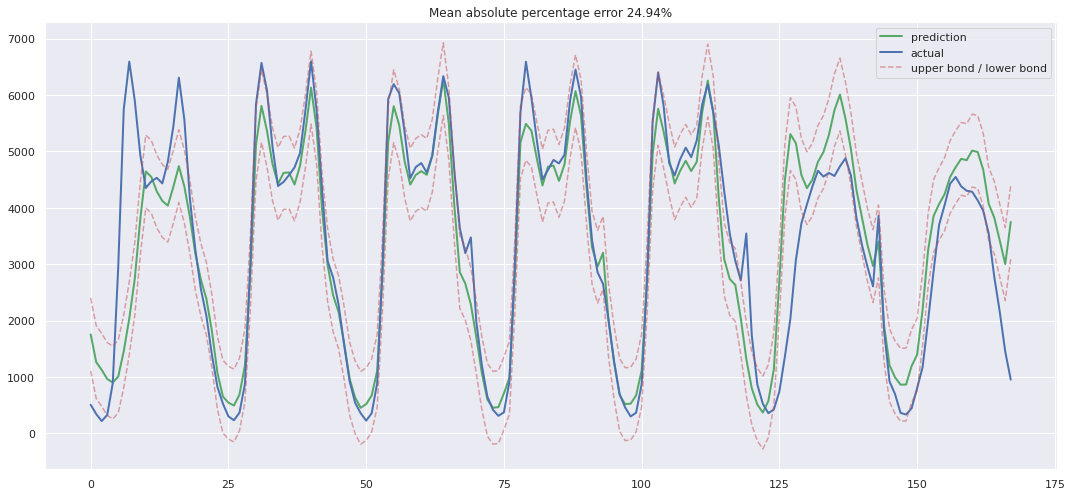

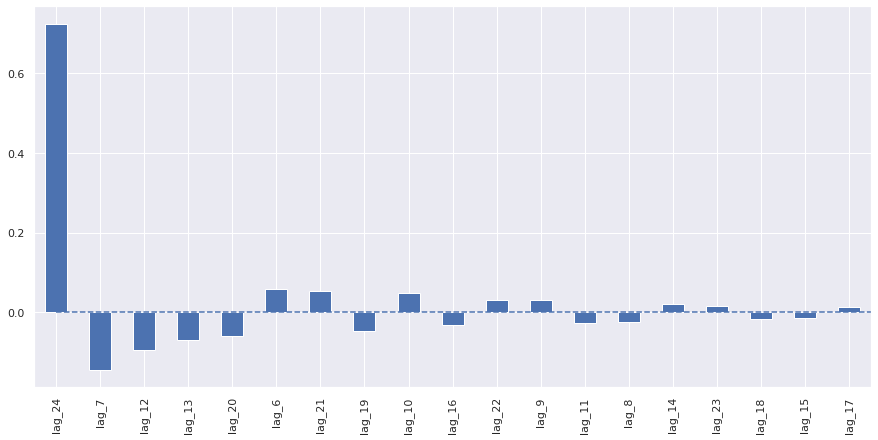

In [202]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

–ë–æ–ª—å—à–∞—è –æ—à–∏–±–∫–∞, –¥–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –ø—Ä–æ—à–∫–∞–ª–∏—Ä—É–µ–º

In [203]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [229]:
def cycle_data_encoding(df, cycle, name):
    df['sin_' + name] = np.sin(2*np.pi*df[name]/cycle)
    df['cos_' + name] = np.cos(2*np.pi*df[name]/cycle)

    return df

In [240]:
def prepareData(series, lag_start, lag_end, test_index, target_encoding=False, circle_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
            
        get_dummies: boolean
            if True - encode categorical into dummies
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["traffic_volume"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.traffic_volume.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    if target_encoding:
        # calculate averages on train set only
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "traffic_volume").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "traffic_volume").get, data.hour))
    if circle_encoding:
        data = cycle_data_encoding(data, 24, 'hour')
        data = cycle_data_encoding(data, 7, 'weekday')
        # drop encoded variables 
    if circle_encoding or target_encoding:
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().traffic_volume
    X = data.dropna().drop(['traffic_volume'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_index)

    return X_train, X_test, y_train, y_test

In [221]:
data_copy.head(10)

traffic_volume   lag_6   lag_7   lag_8   lag_9  lag_10  \
2018-07-25 00:00:00           664.0  4430.0  5636.0  6558.0  5699.0  4944.0   
2018-07-25 01:00:00           388.0  3371.0  4430.0  5636.0  6558.0  5699.0   
2018-07-25 02:00:00           290.0  3266.0  3371.0  4430.0  5636.0  6558.0   
2018-07-25 03:00:00           372.0  2727.0  3266.0  3371.0  4430.0  5636.0   
2018-07-25 04:00:00           955.0  2178.0  2727.0  3266.0  3371.0  4430.0   
2018-07-25 05:00:00          3121.0  1269.0  2178.0  2727.0  3266.0  3371.0   
2018-07-25 06:00:00          5926.0   664.0  1269.0  2178.0  2727.0  3266.0   
2018-07-25 07:00:00          6595.0   388.0   664.0  1269.0  2178.0  2727.0   
2018-07-25 08:00:00          5651.0   290.0   388.0   664.0  1269.0  2178.0   
2018-07-25 09:00:00          4974.0   372.0   290.0   388.0   664.0  1269.0   

                     lag_11  lag_12  lag_13  lag_14  lag_15  lag_16  lag_17  \
2018-07-25 00:00:00  4664.0  4805.0  4634.0  4386.0  4984.0  5658.0  6409.0   
2018-07-25 01:00:00  4944.0  4664.0  4805.0  4634.0  4386.0  4984.0  5658.0   
2018-07-25 02:00:00  5699.0  4944.0  4664.0  4805.0  4634.0  4386.0  4984.0   
2018-07-25 03:00:00  6558.0  5699.0  4944.0  4664.0  4805.0  4634.0  4386.0   
2018-07-25 04:00:00  5636.0  6558.0  5699.0  4944.0  4664.0  4805.0  4634.0   
2018-07-25 05:00:00  4430.0  5636.0  6558.0  5699.0  4944.0  4664.0  4805.0   
2018-07-25 06:00:00  3371.0  4430.0  5636.0  6558.0  5699.0  4944.0  4664.0   
2018-07-25 07:00:00  3266.0  3371.0  4430.0  5636.0  6558.0  5699.0  4944.0   
2018-07-25 08:00:00  2727.0  3266.0  3371.0  4430.0  5636.0  6558.0  5699.0   
2018-07-25 09:00:00  2178.0  2727.0  3266.0  3371.0  4430.0  5636.0  6558.0   

                     lag_18  lag_19  lag_20  lag_21  lag_22  lag_23  lag_24  
2018-07-25 00:00:00  5782.0  3184.0   891.0   390.0   297.0   391.0   638.0  
2018-07-25 01:00:00  6409.0  5782.0  3184.0   891.0   390.0   297.0   391.0  
2018-07-25 02:00:00  5658.0  6409.0  5782.0  3184.0   891.0   390.0   297.0  
2018-07-25 03:00:00  4984.0  5658.0  6409.0  5782.0  3184.0   891.0   390.0  
2018-07-25 04:00:00  4386.0  4984.0  5658.0  6409.0  5782.0  3184.0   891.0  
2018-07-25 05:00:00  4634.0  4386.0  4984.0  5658.0  6409.0  5782.0  3184.0  
2018-07-25 06:00:00  4805.0  4634.0  4386.0  4984.0  5658.0  6409.0  5782.0  
2018-07-25 07:00:00  4664.0  4805.0  4634.0  4386.0  4984.0  5658.0  6409.0  
2018-07-25 08:00:00  4944.0  4664.0  4805.0  4634.0  4386.0  4984.0  5658.0  
2018-07-25 09:00:00  5699.0  4944.0  4664.0  4805.0  4634.0  4386.0  4984.0

In [231]:
X_train, X_test, y_train, y_test =\
prepareData(data_copy.traffic_volume, lag_start=6, lag_end=25, target_encoding=False, circle_encoding=True)

column_to_scale = [col for col in X_train.columns if 'lag' in col]
X_train_scaled = scaler.fit_transform(X_train[column_to_scale])
X_test_scaled = scaler.transform(X_test[column_to_scale])

X_train[column_to_scale] = X_train_scaled
X_test[column_to_scale] = X_test_scaled

In [232]:
X_train.head()

lag_6     lag_7     lag_8     lag_9    lag_10  \
2018-07-26 00:00:00  0.562452  1.411676  1.698316  1.263617  0.854546   
2018-07-26 01:00:00  0.053874  0.561597  1.409865  1.697139  1.263306   
2018-07-26 02:00:00 -0.162761  0.053303  0.560478  1.408811  1.696776   
2018-07-26 03:00:00 -0.152961 -0.163212  0.052597  0.559787  1.408482   
2018-07-26 04:00:00 -0.488231 -0.153417 -0.163741  0.052123  0.559559   

                       lag_11    lag_12    lag_13    lag_14    lag_15  ...  \
2018-07-26 00:00:00  0.765883  0.734354  0.775506  0.603627  0.824086  ...   
2018-07-26 01:00:00  0.854425  0.765754  0.734327  0.775556  0.603290  ...   
2018-07-26 02:00:00  1.263163  0.854291  0.765726  0.734376  0.775192  ...   
2018-07-26 03:00:00  1.696611  1.263006  0.854263  0.765776  0.734018  ...   
2018-07-26 04:00:00  1.408332  1.696429  1.262972  0.854314  0.765413  ...   

                       lag_20    lag_21    lag_22    lag_23    lag_24  \
2018-07-26 00:00:00 -1.245937 -1.545161 -1.586893 -1.535655 -1.393344   
2018-07-26 01:00:00 -0.133025 -1.245654 -1.544774 -1.585972 -1.535015   
2018-07-26 02:00:00  1.308211 -0.132906 -1.245320 -1.543870 -1.585318   
2018-07-26 03:00:00  1.651949  1.308118 -0.132766 -1.244533 -1.543228   
2018-07-26 04:00:00  1.166913  1.651806  1.308005 -0.132418 -1.243973   

                     is_weekend  sin_hour  cos_hour  sin_weekday  cos_weekday  
2018-07-26 00:00:00           0  0.000000  1.000000     0.433884    -0.900969  
2018-07-26 01:00:00           0  0.258819  0.965926     0.433884    -0.900969  
2018-07-26 02:00:00           0  0.500000  0.866025     0.433884    -0.900969  
2018-07-26 03:00:00           0  0.707107  0.707107     0.433884    -0.900969  
2018-07-26 04:00:00           0  0.866025  0.500000     0.433884    -0.900969  

[5 rows x 24 columns]

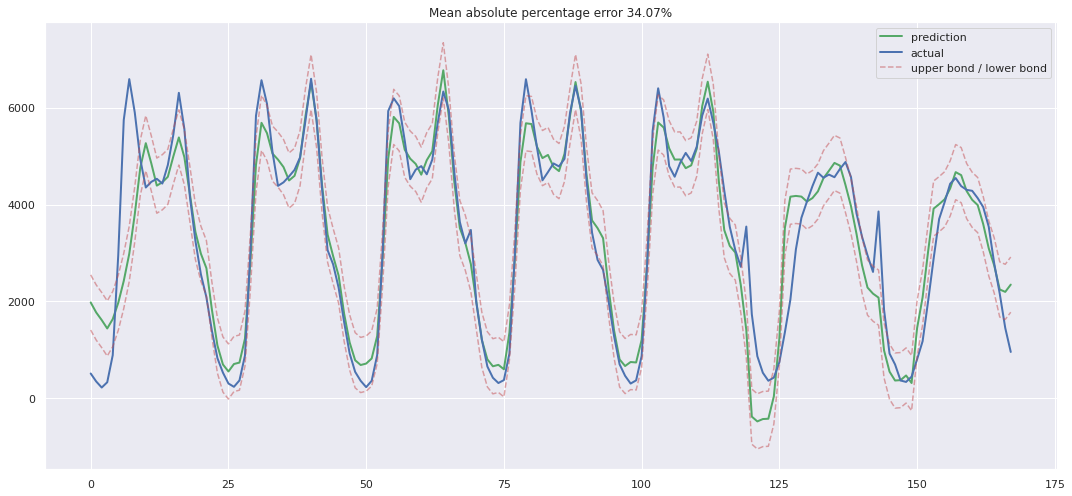

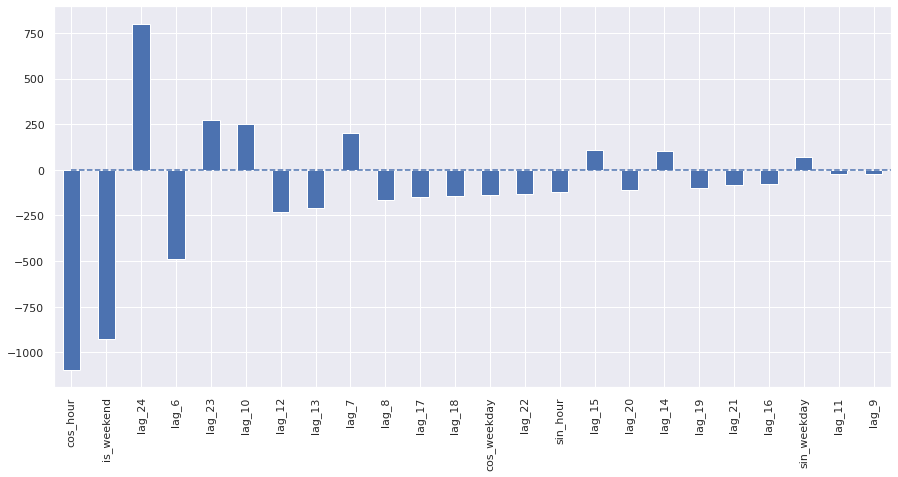

In [233]:
lr = LinearRegression()
lr.fit(X_train, y_train)

plotModelResults(lr, X_train=X_train, X_test=X_test, plot_intervals=True)
plotCoefficients(lr)

–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å —á–∞—Å—ã –∏ –Ω–µ–¥–µ–ª–∏ c –ø–æ–º–æ—â–∏—é —Å–∏–Ω—É—Å–æ–≤ –∏ –∫–æ—Å–∏–Ω—É—Å–æ–≤

### –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –∏ –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–î–ª—è –Ω–∞—á–∞–ª–∞ —É–±–µ–¥–∏–º—Å—è, —á—Ç–æ –Ω–∞–º –µ—Å—Ç—å, —á—Ç–æ –æ—Ç–±—Ä–∞—Å—ã–≤–∞—Ç—å –∏ –≤ –¥–∞–Ω–Ω—ã—Ö –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

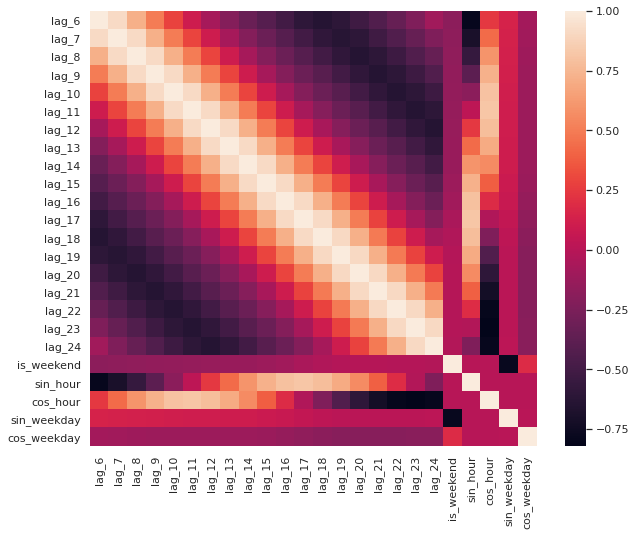

In [234]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

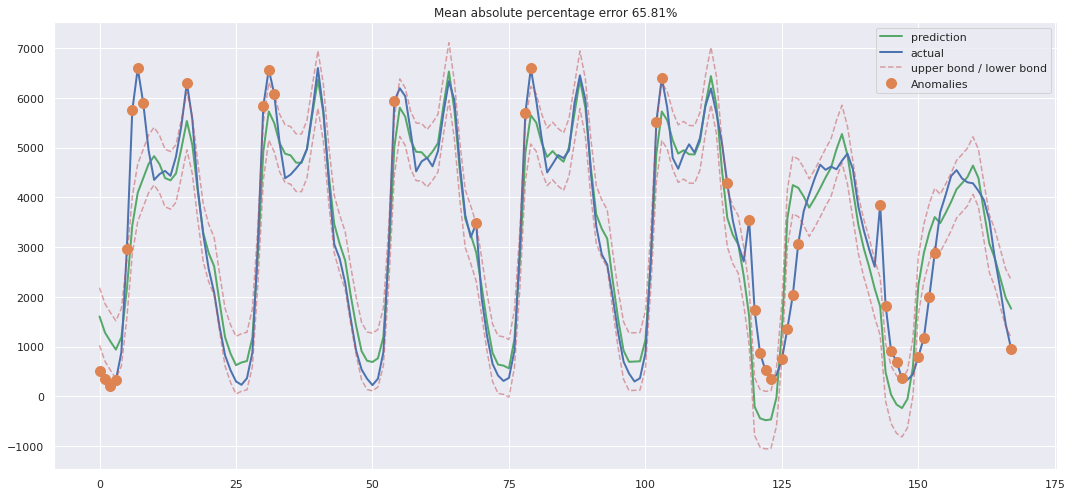

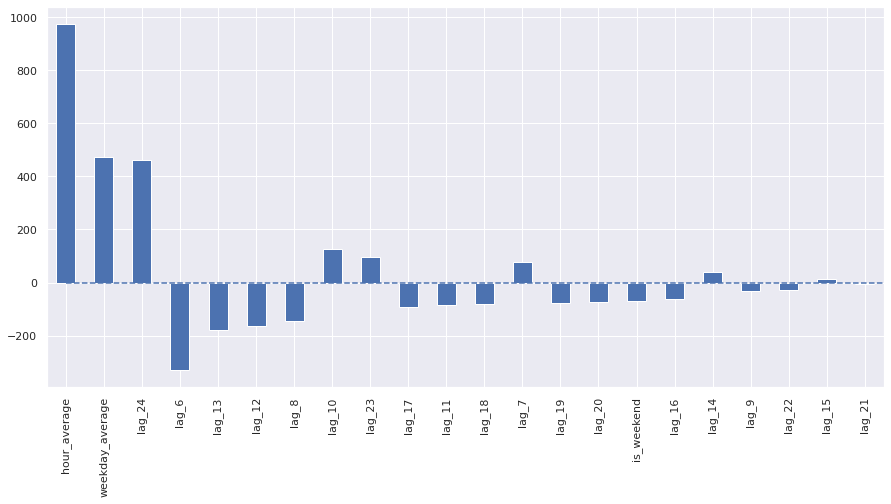

In [241]:
X_train, X_test, y_train, y_test =\
prepareData(data_copy.traffic_volume, lag_start=6, lag_end=25, test_index=-24*7, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

–ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ, –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ average –Ω–∞—Å—Ç–æ–ª—å–∫–æ –ø–æ–Ω—Ä–∞–≤–∏–ª–∏—Å—å –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, —á—Ç–æ –ø–æ –Ω–µ–π, –≤ –æ—Å–Ω–æ–≤–Ω–æ–º, –º–æ–¥–µ–ª—å –∏ —Å—Ç–∞–ª–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å. 

### –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –∏ –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

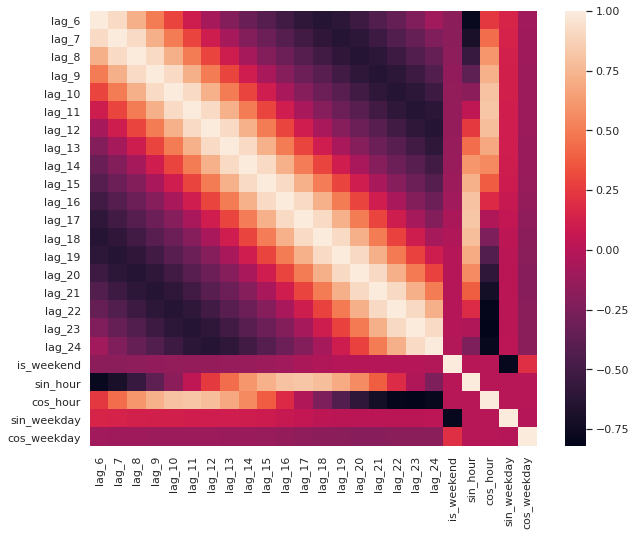

In [252]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

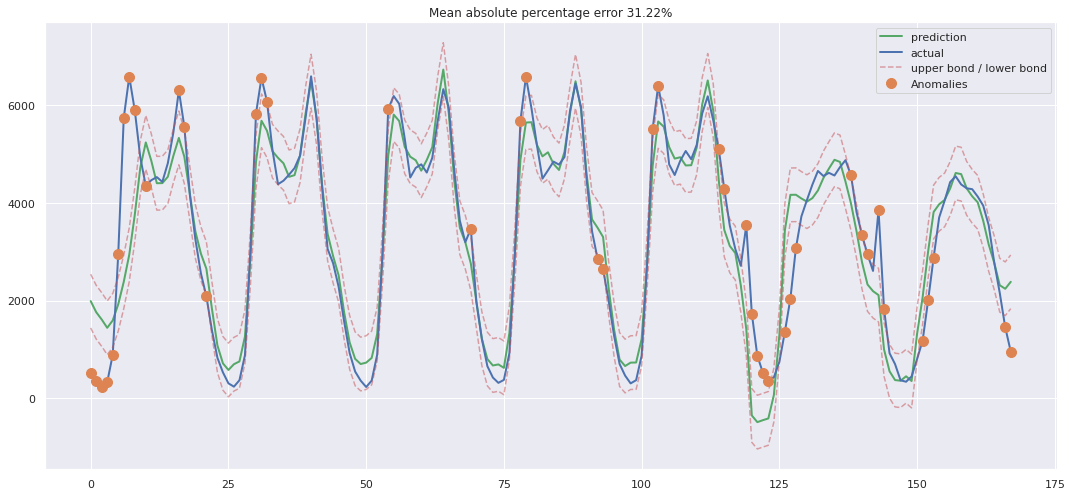

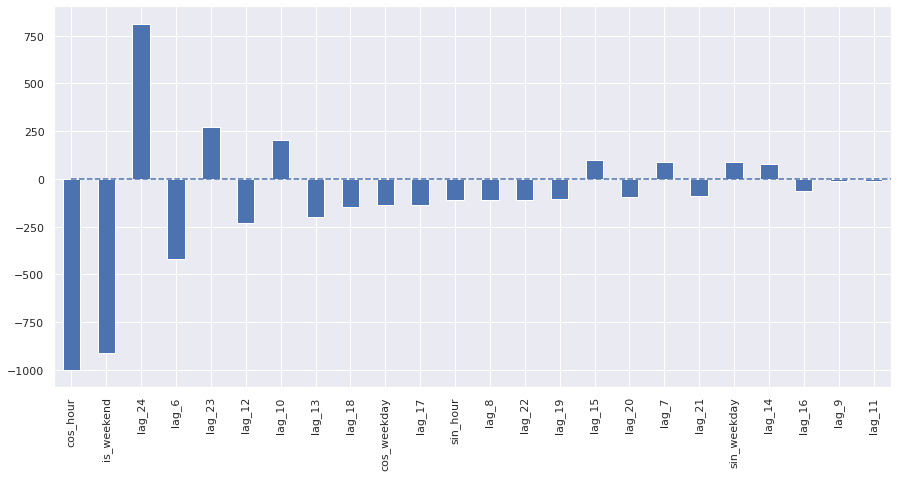

In [253]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv, alphas=np.linspace(5, 10))
ridge.fit(X_train, y_train)

plotModelResults(ridge, 
                 X_train=X_train, 
                 X_test=X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

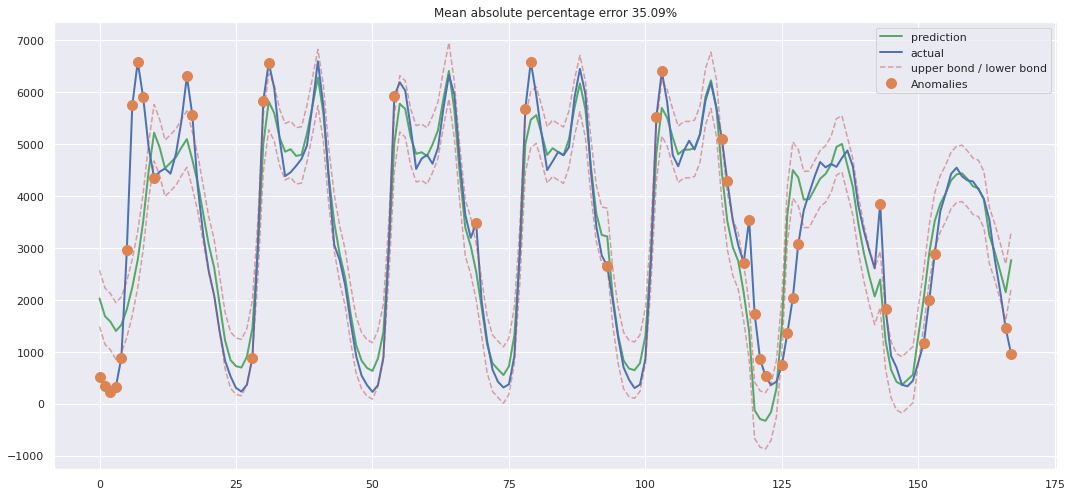

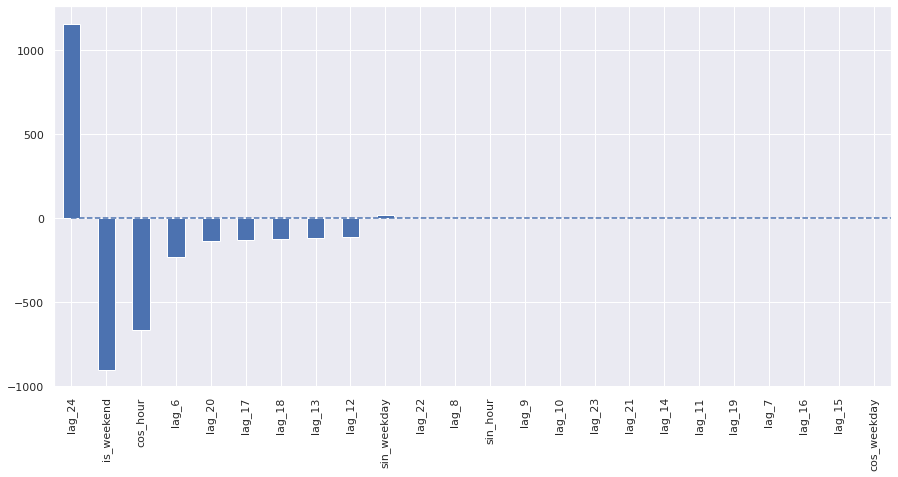

In [254]:
lasso = LassoCV(cv=tscv, eps=0.01)
lasso.fit(X_train, y_train)

plotModelResults(lasso, 
                 X_train=X_train, 
                 X_test=X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

ridge —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ–∫–∞–∑–∞–ª–∞—Å—å –±–æ–ª–µ–µ —É–¥–∞—á–Ω–æ–π –≤ –æ—Ç–±–æ—Ä–µ.

### Boosting

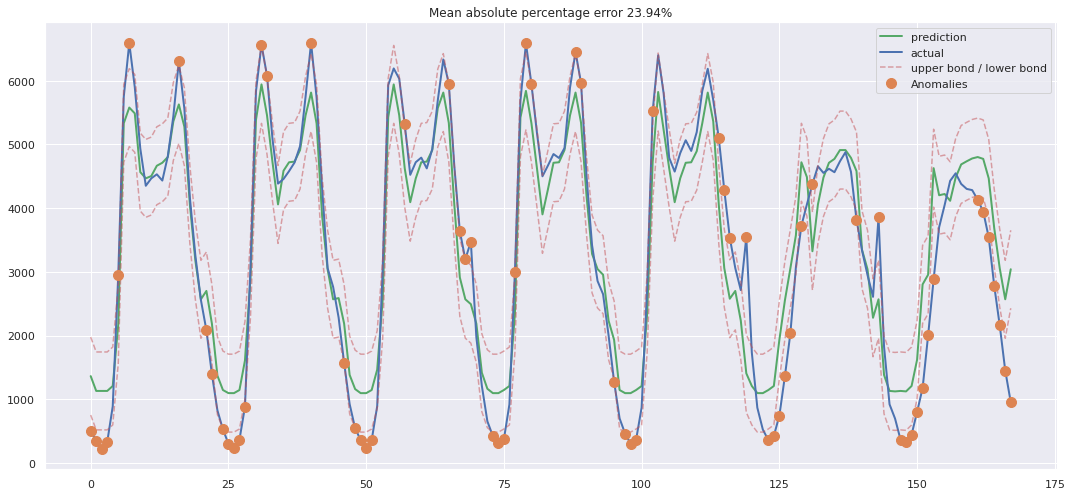

In [255]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

gbr = AdaBoostRegressor(n_estimators=100)
gbr.fit(X_train_scaled, y_train)

plotModelResults(gbr, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

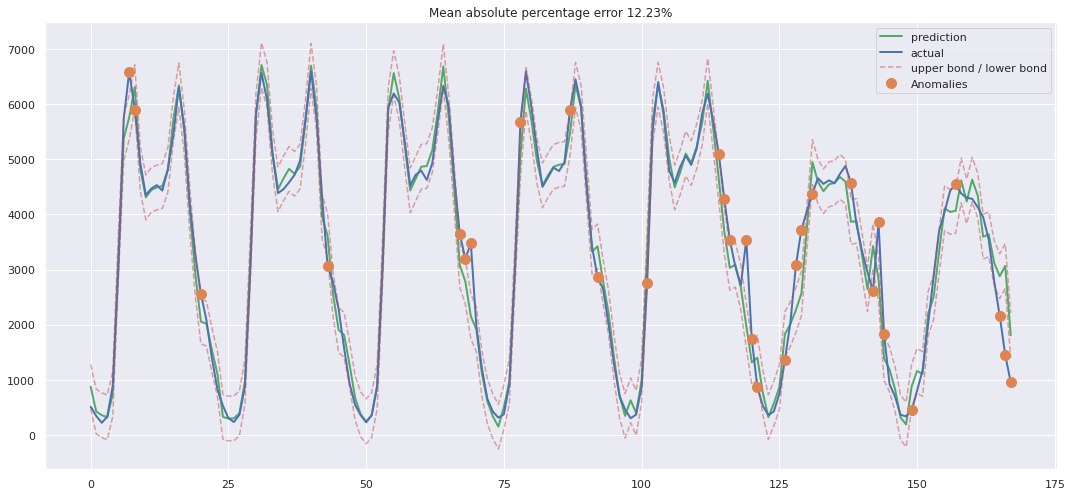

In [258]:
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test =\
prepareData(data_copy.traffic_volume, lag_start=6, lag_end=25, test_index=-24*7, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


catboost = CatBoostRegressor(iterations=100, learning_rate=0.7,
                          loss_function='RMSE', verbose=0)

catboost.fit(X_train_scaled, y_train, verbose=0)

plotModelResults(catboost, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

–í –∏–¥–µ–∞–ª–µ - –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ—á–∏—Å—Ç–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –æ—Ç —Ç—Ä–µ–Ω–¥–∞, —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å —Ç—Ä–µ–Ω–¥ –æ—Ç–¥–µ–ª—å–Ω–æ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏, –∏ –æ—Ç–¥–µ–ª—å–Ω–æ - –æ—á–∏—â–µ–Ω–Ω—ã–π —Ä—è–¥, –∞ –ø–æ—Ç–æ–º —Å–ª–æ–∂–∏—Ç—å –≤–º–µ—Å—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

### Facebook Prophet - automating routines

https://habrahabr.ru/company/ods/blog/323730/

In [259]:
from fbprophet import Prophet

In [261]:
# number of future predictions
predictions = 168

In [267]:
df = df_traffic_features['2018-07-24':]
df = df.reset_index()
for i in ['holiday', 'temp']:
    df = df.drop([i], axis=1)
df.columns = ['ds', 'y']

In [268]:
df.head()

ds      y
0 2018-07-24 00:00:00  638.0
1 2018-07-24 01:00:00  391.0
2 2018-07-24 02:00:00  297.0
3 2018-07-24 03:00:00  390.0
4 2018-07-24 04:00:00  891.0

In [269]:
# reserve some data for testing
train_df = df[:-predictions-1]

In [270]:
# declaring the model, it's necessary to pay attention to seasonality type we want to use
model = Prophet(weekly_seasonality=True, yearly_seasonality=False)
model.fit(train_df)

# creating one more specific dataset for predictions
# we also need to set data frequency here (by default - days)
future = model.make_future_dataframe(periods=predictions, freq='H')
future.tail()

ds
1650 2018-09-30 18:00:00
1651 2018-09-30 19:00:00
1652 2018-09-30 20:00:00
1653 2018-09-30 21:00:00
1654 2018-09-30 22:00:00

In [271]:
# finally, making predictions
forecast = model.predict(future)
forecast.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
1650 2018-09-30 18:00:00  3321.286983  3056.840401  4976.117601  3320.164347   
1651 2018-09-30 19:00:00  3321.221661  2343.064571  4220.359869  3320.085458   
1652 2018-09-30 20:00:00  3321.156339  1563.736022  3540.280703  3320.006830   
1653 2018-09-30 21:00:00  3321.091016  1078.125808  3018.578328  3319.931345   
1654 2018-09-30 22:00:00  3321.025694   760.682273  2651.368575  3319.857410   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1650  3322.391988      650.077327            650.077327            650.077327   
1651  3322.335645      -83.796405            -83.796405            -83.796405   
1652  3322.279729     -770.434953           -770.434953           -770.434953   
1653  3322.226569    -1262.810220          -1262.810220          -1262.810220   
1654  3322.175920    -1598.196268          -1598.196268          -1598.196268   

            daily  daily_lower  daily_upper      weekly  weekly_lower  \
1650  1133.135514  1133.135514  1133.135514 -483.058187   -483.058187   
1651   366.908613   366.908613   366.908613 -450.705017   -450.705017   
1652  -352.373264  -352.373264  -352.373264 -418.061689   -418.061689   
1653  -877.481530  -877.481530  -877.481530 -385.328691   -385.328691   
1654 -1245.497342 -1245.497342 -1245.497342 -352.698926   -352.698926   

      weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
1650   -483.058187                   0.0                         0.0   
1651   -450.705017                   0.0                         0.0   
1652   -418.061689                   0.0                         0.0   
1653   -385.328691                   0.0                         0.0   
1654   -352.698926                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
1650                         0.0  3971.364310  
1651                         0.0  3237.425256  
1652                         0.0  2550.721385  
1653                         0.0  2058.280796  
1654                         0.0  1722.829426

Mean absolute percentage error 48.68%


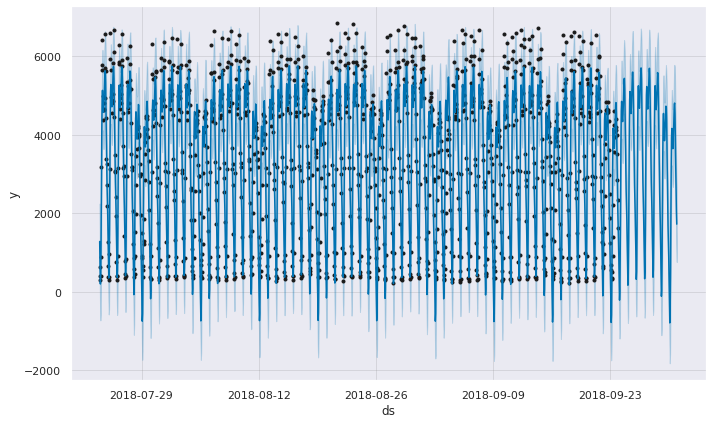

In [272]:
# pictures!
error = mean_absolute_percentage_error(df[-predictions:]['y'], forecast[-predictions:]['yhat'])
print("Mean absolute percentage error {0:.2f}%".format(error))
_ = model.plot(forecast)

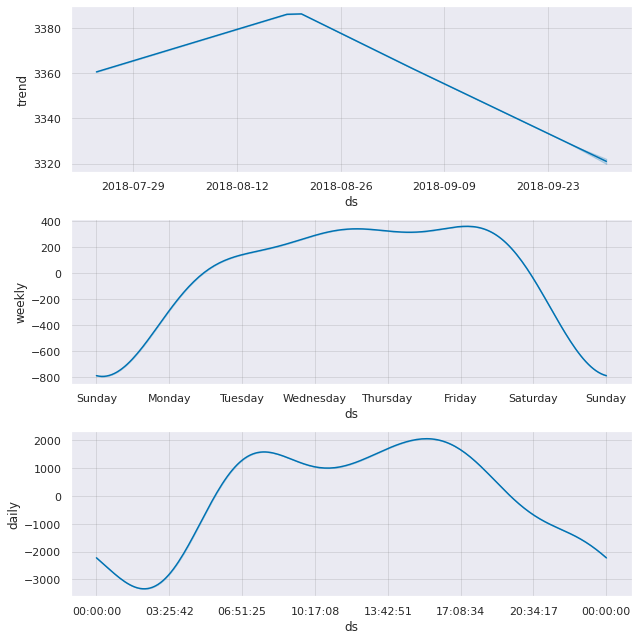

In [273]:
_ = model.plot_components(forecast)

–ü–æ–ª–µ–∑–Ω–∞ –¥–ª—è –ø—Ä–æ—Ç–æ—Ç–∏–ø–∏—Ä–æ–≤–∞–Ω–∏—è –∏–ª–∏ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∏—Å–ª–µ–¥–æ–≤–∞–Ω–∏–π, –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –≤–∑–ª–µ—Ç–∏—Ç , –Ω–µ –≤–∑–ª–µ—Ç–∏—Ç. –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∏–∂–µ, —á–µ–º —É –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

Amazon GluonTS - new big player on the market

–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å. GluonTS –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –≤–µ—Ä—Ö–Ω–µ—É—Ä–æ–≤–Ω–µ–≤—É—é –∞–±—Å—Ç—Ä–∞—Ü–∏—é Dataset, –∫–æ—Ç–æ—Ä–∞—è –ø–µ—Ä–µ–≤–æ–¥–∏—Ç —Ä–∞–∑–Ω–æ—Ä–æ–¥–Ω—ã–µ —Ñ–æ—Ä–º–∞—Ç—ã –¥–∞–Ω–Ω—ã—Ö –≤ –æ–¥–∏–Ω, —É–¥–æ–±–Ω—ã–π –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–π —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π. –í —á–∞—Å—Ç–Ω–æ—Å—Ç–∏, ListDataset –ø–µ—Ä–µ–≤–æ–¥–∏—Ç –¥–∞–Ω–Ω—ã–µ –≤ —Å–ø–∏—Å–æ–∫ —Å–ª–æ–≤–∞—Ä–µ–π, –≥–¥–µ –æ—Ç–¥–µ–ª—å–Ω–æ –∑–∞–ø–∏—Å–∞–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è —Ä—è–¥–∞ –∏ —Ç–∞–π–º—Å—Ç—ç–º–ø—ã. –î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Ç–∞–∫–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –º—ã –ø–µ—Ä–µ–¥–∞—ë–º –Ω–∞—à –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥, —É–∫–∞–∑—ã–≤–∞–µ–º –µ–≥–æ —á–∞—Å—Ç–æ—Ç—É (–≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —É –Ω–∞—Å –ø–æ—á–∞—Å–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ, –ø–æ—ç—Ç–æ–º—É —á–∞—Å—Ç–æ—Ç–∞ "H"), –∞ —Ç–∞–∫–∂–µ —Ç–æ—á–∫—É, –¥–æ –∫–æ—Ç–æ—Ä–æ–π –Ω–∞—à —Ä—è–¥ –±—É–¥–µ—Ç –æ—Ç–Ω–µ—Å—ë–Ω –∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:

In [274]:
df = df_traffic_features['2018-07-24':].copy()
for i in ['holiday', 'temp']:
    df = df.drop([i], axis=1)

In [275]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.traffic_volume[:"2018-09-15"]}],
    freq = "H"
)

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–æ–π —Ñ–æ—Ä–º–∞—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –¥–∞–Ω–Ω—ã–µ:

In [276]:
training_data.list_data

[{'start': Timestamp('2018-07-24 00:00:00', freq='H'),
  'target': 2018-07-24 00:00:00     638.0
  2018-07-24 01:00:00     391.0
  2018-07-24 02:00:00     297.0
  2018-07-24 03:00:00     390.0
  2018-07-24 04:00:00     891.0
                          ...  
  2018-09-15 19:00:00    3455.0
  2018-09-15 20:00:00    3208.0
  2018-09-15 21:00:00    3055.0
  2018-09-15 22:00:00    2741.0
  2018-09-15 23:00:00    2123.0
  Freq: H, Name: traffic_volume, Length: 1296, dtype: float64}]

–û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å

In [277]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(
    freq="H", 
    prediction_length=168, 
    trainer=Trainer(epochs=10)
)
predictor = estimator.train(training_data=training_data)

INFO:gluonts.mx.context:Using CPU
INFO:gluonts.trainer:Start model training
INFO:gluonts.trainer:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:gluonts.trainer:Number of parameters in DeepARTrainingNetwork: 27644
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:18<00:00,  2.65it/s, epoch=1/10, avg_epoch_loss=8.18]
INFO:gluonts.trainer:Epoch[0] Elapsed time 18.912 seconds
INFO:gluonts.trainer:Epoch[0] Evaluation metric 'epoch_loss'=8.176171
INFO:gluonts.trainer:Epoch[1] Learning rate is 0.001
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:15<00:00,  3.13it/s, epoch=2/10, avg_epoch_loss=7.33]
INFO:gluonts.trainer:Epoch[1] Elapsed time 15.991 seconds
INFO:gluonts.trainer:Epoch[1] Evaluation metric 'epoch_loss'=7.325097
INFO:gluonts.trainer:Epoch[2] Learning rate is 0.001
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:15<00:00,  3.21it/s, epoch=3/10, avg_epoch_loss=7.05]
INFO:gluonts.trainer:Epoch[2] Elapsed time 15.598 seconds
INFO:gluonts.trainer:Epoch[2] Evaluation metric 'epoch_loss'=7.048893
INFO:gluonts.trainer:Epoch[3] Learning rate is 0.001
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:17<00:00,  2.80it/s, epoch=4/10, 

In [278]:
df.index[0]

Timestamp('2018-07-24 00:00:00', freq='H')

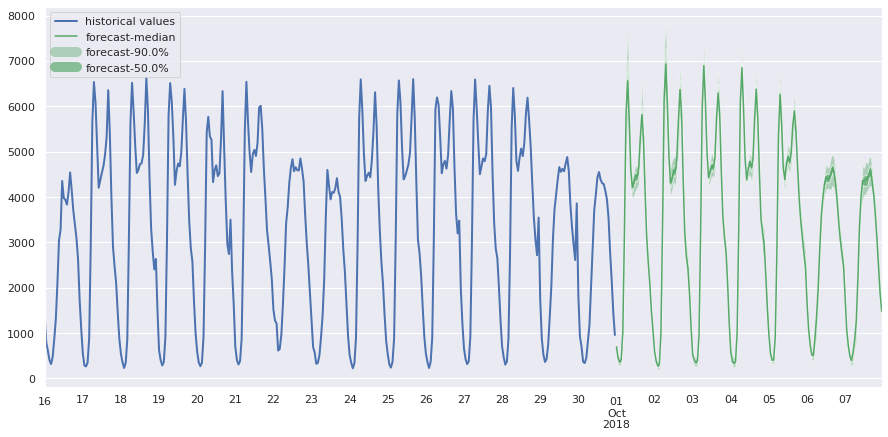

In [279]:
from gluonts.dataset.util import to_pandas

df = df_traffic_features['2018-09-16':].copy()
for i in ['holiday', 'temp']:
    df = df.drop([i], axis=1)

test_data = ListDataset(
    [{"start": df.index[0], "target": df.traffic_volume["2018-09-16":]}],
    freq = "H"
)

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry).plot(linewidth=2, figsize=(15, 7), label="historical values")
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0], label="forecast")
    
plt.legend(loc='upper left')
plt.grid(axis='x')

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –æ—á–µ–Ω—å –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑, –∫–æ—Ç–æ—Ä—ã–π —É—á–∏—Ç—ã–≤–∞–µ—Ç –∏ –Ω–µ–¥–µ–ª—å–Ω—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ 30-–¥–Ω–µ–≤–Ω—É—é —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å. –•–æ—Ä–æ—à–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∞—Å—à–∏—Ä—è—é—Ç—Å—è –≤ –º–æ–º–µ–Ω—Ç –ø–∏–∫–∞, –≥–¥–µ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –±—ã–ª–∏ –Ω–∞–∏–º–µ–Ω–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã–º–∏, –∏ —Å—É–∂–∞—é—Ç—Å—è –≤ –æ–±—ã—á–Ω—ã–µ –¥–Ω–∏, –≥–¥–µ –¥–∏—Å–ø–µ—Ä—Å–∏—è –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∞ –Ω–µ —Ç–∞–∫–æ–π –±–æ–ª—å—à–æ–π.

GluonTS - –æ—á–µ–Ω—å —É–¥–æ–±–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –±—ã—Å—Ç—Ä–æ –∏ –≤–µ—Ä—Ö–Ω–µ—É—Ä–æ–≤–Ω–µ–≤–æ –ø–æ–ª—É—á–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—É—é –º–æ–¥–µ–ª—å –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –∏—Å–ø–æ–ª—å–∑—É—è –≥–ª—É–±–æ–∫–æ–µ –æ–±—É—á–µ–Ω–∏–µ –ø–æ–¥ –∫–∞–ø–æ—Ç–æ–º. –ü–æ–º–∏–º–æ —Ö–æ—Ä–æ—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—É—á–∞—é—Ç—Å—è –ø—Ä—è–º–æ –∏–∑ –∫–æ—Ä–æ–±–∫–∏, GluonTS –º–æ–∂–Ω–æ —Ç–æ–Ω–∫–æ –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å –ø–æ–¥ –ª—é–±—ã–µ –Ω—É–∂–¥—ã